In [2]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
print("Setup complete.")

Setup complete.


# Testing notebook used to understand the dataset structure.

In [49]:
file = '../input/glioblastoma-radiosensitivity-dataset/glioblastoma_data/extracted_data/cell_behaviors/videos_transcriptions_csv/0gy_n1_201104.nd2u2510GyA3A.csv'
data = pd.read_csv(file)

data.head()

,time,event,input,output
0,0,begin,[],C1
1,66,div,C1,"['C1.1', 'C1.2']"
2,238,div,C1.1,"['C1.1.1', 'C1.1.2']"
3,386,div,C1.1.1,"['C1.1.1.1', 'C1.1.1.2']"
4,432,end,C1.1.1.1,[]


The data aren't sorted in function of time.

In [21]:
data.sort_values(by="time").head()

,time,event,input,output
0,0,begin,[],C1
49,0,begin,[],C5
111,0,begin,[],C8
23,0,begin,[],C3
16,0,begin,[],C2


In [14]:
data.describe(include=[object])

,event,input,output
count,125,125,125
unique,6,117,65
top,end,[],[]
freq,59,9,61


In [15]:
data.describe(include="all")

,time,event,input,output
count,125.00000,125,125,125
unique,NaN,6,117,65
top,NaN,end,[],[]
freq,NaN,59,9,61
mean,328.94400,NaN,NaN,NaN
std,147.00051,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN
25%,256.00000,NaN,NaN,NaN
50%,414.00000,NaN,NaN,NaN
75%,432.00000,NaN,NaN,NaN


## Testing "end" event :

In [19]:
endTest = data[data["event"] == "end"]
endTest.head()

,time,event,input,output
4,432,end,C1.1.1.1,[]
5,432,end,C1.1.1.2,[]
7,432,end,C1.1.2.1,[]
8,432,end,C1.1.2.2,[]
11,432,end,C1.2.1.1,[]


In [23]:
endTest.input.describe()

count           59
unique          59
top       C1.1.1.1
freq             1
Name: input, dtype: object

The "end" event means that one cell dies (only one at a time).

## Testing "fusion" event

In [24]:
fusionTest = data[data["event"] == "fusion"]
fusionTest.head()

,time,event,input,output
18,153,fusion,"['C2.1', 'C2.2']",C2.3
113,104,fusion,"['C8.1', 'C8.2']",C8.3


In [26]:
fusionTest.input.describe()

count                    2
unique                   2
top       ['C2.1', 'C2.2']
freq                     1
Name: input, dtype: object

The "fusion" event means that there is one cell less. (only two cells fusion)

## Testing "div" event

In [27]:
divTest = data[data["event"] == "div"]
divTest.head()

,time,event,input,output
1,66,div,C1,"['C1.1', 'C1.2']"
2,238,div,C1.1,"['C1.1.1', 'C1.1.2']"
3,386,div,C1.1.1,"['C1.1.1.1', 'C1.1.1.2']"
6,386,div,C1.1.2,"['C1.1.2.1', 'C1.1.2.2']"
9,259,div,C1.2,"['C1.2.1', 'C1.2.2']"


In [28]:
divTest.output.describe()

count                   53
unique                  53
top       ['C1.1', 'C1.2']
freq                     1
Name: output, dtype: object

In [18]:
#dir(data)
#help(data.apply)
help(data.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis: 'Axis' = 0, ascending=True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc' = None) method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    

In [37]:
def biomass(row):
    nb_in = len(row.input)
    nb_out = len(row.output)
    biomass.last = biomass.last + (nb_out - nb_in)
    row["cellAlive"] = biomass.last
    return row
biomass.last = 0

In [38]:
#data.sort_values(by="time")
biomass.last = 0
timeSeries = data.sort_values(by="time").apply(biomass, axis=1)
print(type(timeSeries))
timeSeries

<class 'pandas.core.frame.DataFrame'>


,time,event,input,output,cellAlive
0,0,begin,[],C1,0
49,0,begin,[],C5,0
111,0,begin,[],C8,0
23,0,begin,[],C3,0
16,0,begin,[],C2,0
...,...,...,...,...,...
48,432,end,C4.2.2.2,[],536
47,432,end,C4.2.2.1,[],530
45,432,end,C4.2.1,[],526
42,432,end,C4.1.1,[],522


In [39]:
import matplotlib.pyplot as plt

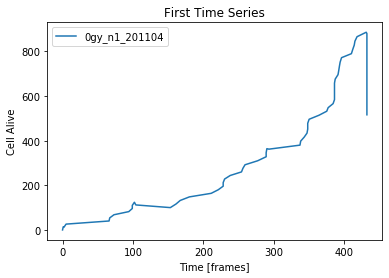

In [54]:
plt.plot(timeSeries.time.to_numpy(), timeSeries.cellAlive.to_numpy(), label="0gy_n1_201104") #label should be automated
plt.title("First Time Series")
plt.xlabel("Time [frames]")
plt.ylabel("Cell Alive")
plt.legend()
plt.show()